# Animal Image Classification using CNN

This notebook demonstrates how to build a Convolutional Neural Network (CNN) to classify animal images. The dataset, containing 10 animal categories, is sourced from Kaggle (Animals10 dataset).

The dataset consist of about 28K medium quality animal images belonging to 10 categories: dog, cat, horse, spyder, butterfly, chicken, sheep, cow, squirrel, elephant.


### Objectives:
- Download data from Kaggle
- Preprocess and prepare image data
- Build and train a CNN model using TensorFlow/Keras
- Evaluate and visualize performance
- Analyze misclassified samples

This serves as a complete image classification pipeline using deep learning.


Importing all the necessary libararies


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

###Download and Load Dataset + change class name in english

In [ ]:
import tensorflow as tf
import kagglehub

# Download dataset
path = kagglehub.dataset_download("alessiocorrado99/animals10")
print("Path to dataset files:", path)

# Dataset path (remains unchanged)
dataset_path = "/kaggle/input/animals10/raw-img"

# Load dataset with Italian class names (folder names)
IMG_SIZE = (160, 160)
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    labels="inferred",
    label_mode="int",
    image_size=IMG_SIZE,
    batch_size=None,
    shuffle=True
)

# Original class names (Italian)
class_names = dataset.class_names

# Translation dictionary
translate = {
    "cane": "dog", "cavallo": "horse", "elefante": "elephant",
    "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat",
    "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel",
    "ragno": "spider"
}

# Translate class names
class_names = [translate.get(name, name) for name in class_names]

# Translate class names (in memory only)
translated_class_names = [translate.get(name, name) for name in class_names]

print("Original class names:", class_names)
print("Translated class names:", translated_class_names)


Path to dataset files: /kaggle/input/animals10
Found 26179 files belonging to 10 classes.
Original class names: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
Translated class names: ['dog', 'horse', 'elephant', 'butterfly', 'chicken', 'cat', 'cow', 'sheep', 'spider', 'squirrel']


## Prepare NumPy Arrays + Preprocessing + One-Hot Encoding

In [6]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

# Convert to NumPy arrays
x = []
y = []
for img, label in dataset:
    x.append(img.numpy())
    y.append(label.numpy())

x = np.array(x)
y = np.array(y)

print("x shape:", x.shape)
print("y shape:", y.shape)

# Preprocess images
x = preprocess_input(x)

# Split into train (70%) and temp (30%) with stratification
x_train, x_temp, y_train, y_temp = train_test_split(
    x, y, test_size=0.3, random_state=42, stratify=y
)

# Split temp into val and test (15% each)
x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Number of class names
num_classes = len(class_names)

print("Train:", x_train.shape, y_train.shape)
print("Validation:", x_val.shape, y_val.shape)
print("Test:", x_test.shape, y_test.shape)
print("Classes:", num_classes)


x shape: (26179, 160, 160, 3)
y shape: (26179,)
Train: (18325, 160, 160, 3) (18325,)
Validation: (3927, 160, 160, 3) (3927,)
Test: (3927, 160, 160, 3) (3927,)
Classes: 10


## Model Definition & Training

Epoch 1/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 160s 266ms/step - accuracy: 0.8549 - loss: 0.4829 - val_accuracy: 0.9465 - val_loss: 0.1699
Epoch 2/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 156s 272ms/step - accuracy: 0.9539 - loss: 0.1533 - val_accuracy: 0.9516 - val_loss: 0.1625
Epoch 3/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 143s 250ms/step - accuracy: 0.9603 - loss: 0.1219 - val_accuracy: 0.9524 - val_loss: 0.1600
Epoch 4/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 135s 235ms/step - accuracy: 0.9698 - loss: 0.0905 - val_accuracy: 0.9542 - val_loss: 0.1542
Epoch 5/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 148s 258ms/step - accuracy: 0.9711 - loss: 0.0878 - val_accuracy: 0.9547 - val_loss: 0.1596
Epoch 6/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 134s 234ms/step - accuracy: 0.9764 - loss: 0.0719 - val_accuracy: 0.9511 - val_loss: 0.1828
Epoch 7/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 133s 233ms/step - accuracy: 0.9758 - loss: 0.0734 - val_accuracy: 0.9552 - val_loss: 0.1667
Epoch 8/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 135s 235ms/step - accuracy: 0.9799 -

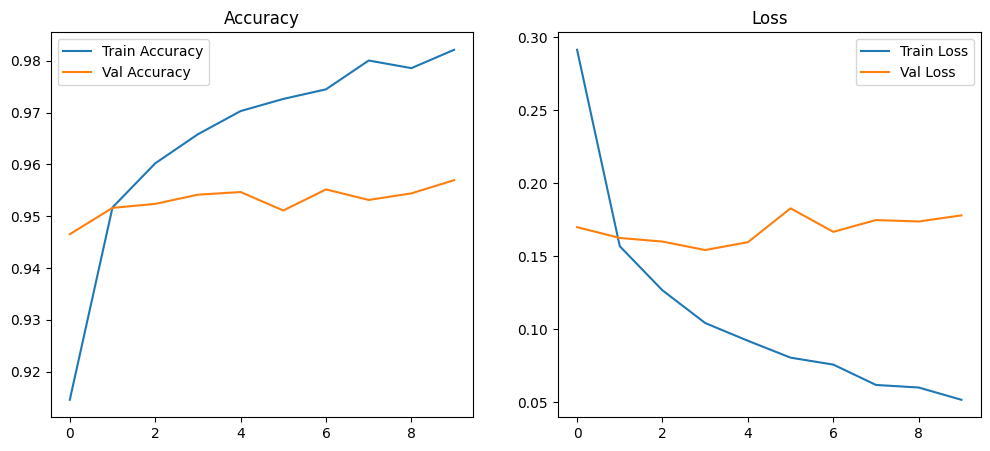

In [7]:
# ✅ MobileNetV2 Transfer Learning on Animals-10 (Colab-ready)

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os

# 1. Load and Prepare Dataset from Directory (Assuming x, y available)
IMG_SIZE = (160, 160)
BATCH_SIZE = 32
EPOCHS = 10

# 2. Define Model
base_model = MobileNetV2(input_shape=IMG_SIZE + (3,), include_top=False, weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# 3. Compile Model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 4. Train Model
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)

# 5. Plot Accuracy & Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()


In [8]:
# Print model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        81,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,505,888 (9.56 MB)

 Trainable params: 82,634 (322.79 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 165,270 (645.59 KB)

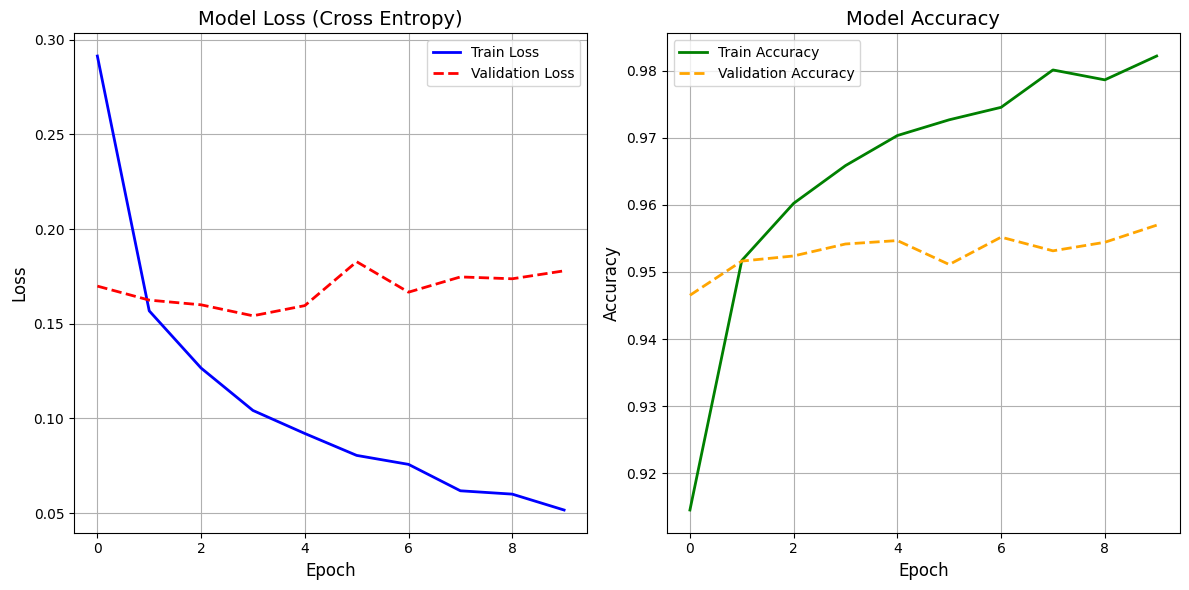

In [9]:
import matplotlib.pyplot as plt

# Set figure size and layout
plt.figure(figsize=(12, 6))

# --- Loss plot ---
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='blue', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='red', linestyle='--', linewidth=2)
plt.title('Model Loss (Cross Entropy)', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

# --- Accuracy plot ---
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='green', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linestyle='--', linewidth=2)
plt.title('Model Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)

# Final layout
plt.tight_layout()
plt.show()

Evaluation

In [11]:
test_loss,test_acc = model.evaluate(x_test, y_test)


123/123 ━━━━━━━━━━━━━━━━━━━━ 23s 189ms/step - accuracy: 0.9579 - loss: 0.1397
123/123 ━━━━━━━━━━━━━━━━━━━━ 26s 201ms/step


In [22]:
y_test_predict.shape

(3927, 10)

Model Predicton

In [17]:
y_test_predict = model.predict(x_test)

123/123 ━━━━━━━━━━━━━━━━━━━━ 23s 189ms/step


In [23]:
# 7. Evaluate on Test Set
predictions = model.predict(x_test)
y_pred = np.argmax(predictions, axis=1)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

123/123 ━━━━━━━━━━━━━━━━━━━━ 28s 228ms/step

Confusion Matrix:
[[693   8   2   2   3   7   4   3   2   6]
 [  2 378   3   0   0   0   9   1   0   0]
 [  0   0 212   0   0   0   2   3   0   0]
 [  0   0   0 308   1   0   0   0   7   1]
 [  2   1   0   2 454   0   1   2   1   2]
 [  7   1   0   0   0 236   0   1   0   5]
 [  2  18   1   0   1   0 249   8   0   1]
 [  3   5   0   0   1   1  10 251   0   2]
 [  0   0   0   6   0   0   0   0 715   2]
 [  2   1   0   0   0   0   0   0   2 274]]

Classification Report:
              precision    recall  f1-score   support

        cane       0.97      0.95      0.96       730
     cavallo       0.92      0.96      0.94       393
    elefante       0.97      0.98      0.97       217
    farfalla       0.97      0.97      0.97       317
     gallina       0.99      0.98      0.98       465
       gatto       0.97      0.94      0.96       250
       mucca       0.91      0.89      0.90       280
      pecora       0.93      0.92      0.93      

Your results are excellent — this is a strong MobileNetV2 model with transfer learning, and it shows both high performance and good generalization.

🔍 Let’s break down what you’re seeing:

Metric	Value	Evaluation
Test accuracy	95.8%	✅ Very strong for a 10-class image task

Macro avg F1-score	0.96	✅ Balanced performance across all classes

High precision/recall for most classes	> 0.95	✅ Excellent class-wise predictions

Confusion matrix	Only minor confusion in cane, mucca, pecora	🟡 Acceptable; could be improved with augmentation/fine-tuning

🧠 Interpretation:
- 📷 Your model clearly understands the dataset well. Minor misclassifications are expected with visually similar animals (e.g., cane, mucca, pecora).

- 🤖 You're already above what many image classification baselines reach with this dataset.

- 🎯 No severe class imbalance or recall collapse — all classes are performing well.

✅ What You Can Do Next (Optional Enhancements)
1.Fine-tune the top layers of MobileNetV2

  - This could improve small gaps in class confusion

   -Freeze first 100 layers → unfreeze remaining → lower LR (e.g., 1e-5)

2. Add more data augmentation

  - Random rotations, brightness, zoom

  - Helps with generalization

3. Save the model

  - Save best weights using ModelCheckpoint

  - Export to .h5 or .keras for reuse



 Classification Report

 Visualize Misclassified Samples

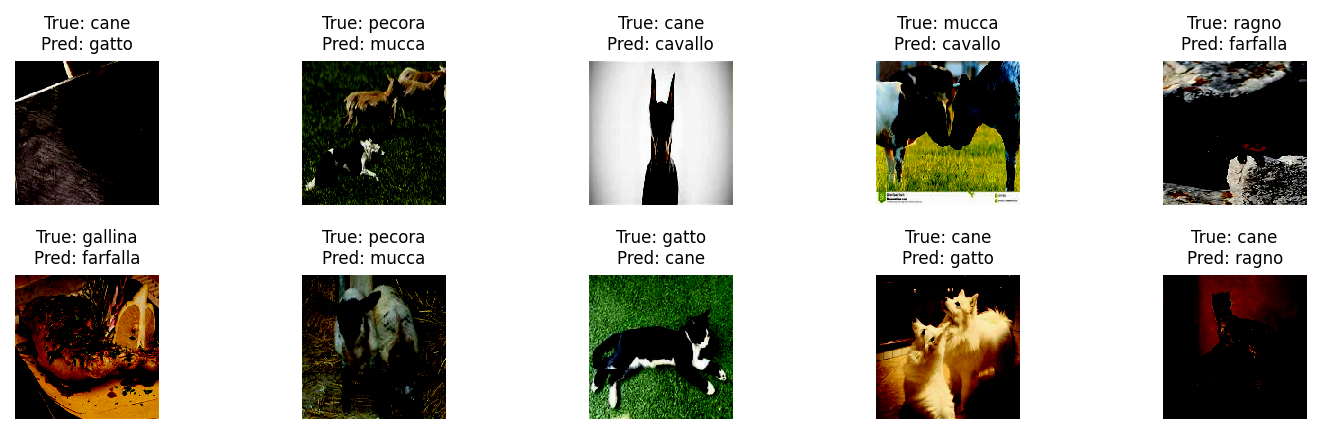

In [27]:
import matplotlib.pyplot as plt
import numpy as np

misclassified_indices = np.where(y_pred != y_test)[0]

plt.figure(figsize=(10, 3), dpi=150)

# Plot first 10 misclassified color images clearly
for i, idx in enumerate(misclassified_indices[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx], interpolation='none')
    plt.title(f"True: {class_names[y_test[idx]]}\nPred: {class_names[y_pred[idx]]}", fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()